## Phase 4 (Modeling): Decision Tree

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 8](https://data-science.training/kapitel-8/)
* Datum: 23.03.2023

Versionen 4 und 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 4, 5
version  = 5
# Modell-Abkürzung festlegen: dt = Decision Tree
shortcut = 'dt'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Decision Tree Methode auswählen
#  (KNIME: "XYZ Learner")
model = DecisionTreeClassifier(random_state=0)
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [10]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 482
* TP (True  Positives) : 239
* FN (False Negatives) : 103
* FP (False Positives) : 67

Gütemaße

* Genauigkeit  (Accuracy)    :   80,92 %
* Spezifität   (Specificity) :   87,79 %
* Sensitivität (Sensitivity) :   69,88 %
* Präzision    (Precision)   :   78,62 %
* Recall       (Recall)      :   69,88 %
* F-Maß        (F Score)     :   73,72 %
* AURC         (AURC)        :   78,91 %
* LogLoss      (LogLoss)     :    5,151

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,04 %


In [11]:
# Ergebnisse anzeigen (Markdown-Tabellen-Format)
sf.dst_display_scores(scores)


Confusion Matrix

|          | Prognose | Prognose |
| ---------| ---------| ---------|
|          | Positive | Negative |
| Positive | TP = 239 | FN = 103 |
| Negative | FP = 67 | TN = 482 |

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    |  80,92 %  |
| Spezifität   | (Specificity) |  87,79 %  |
| Sensitivität | (Sensitivity) |  69,88 %  |
| Präzision    | (Precision)   |  78,62 %  |
| Recall       | (Recall)      |  69,88 %  |
| F-Maß        | (F Score)     |  73,72 %  |
| AURC         | (AURC)        |  78,91 %  |
| LogLoss      | (LogLoss)     |   5,151   |

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,04 %


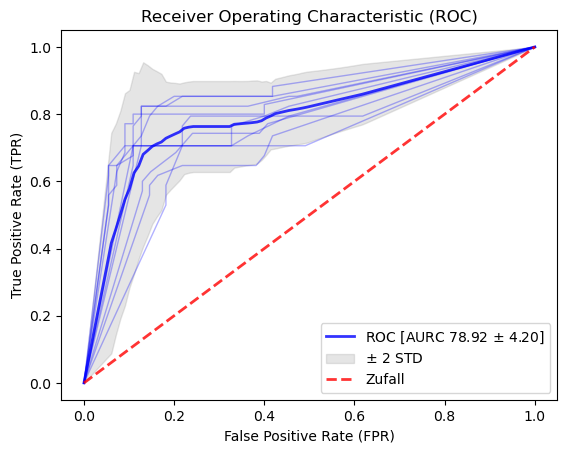

In [12]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [13]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

DecisionTreeClassifier(random_state=0)

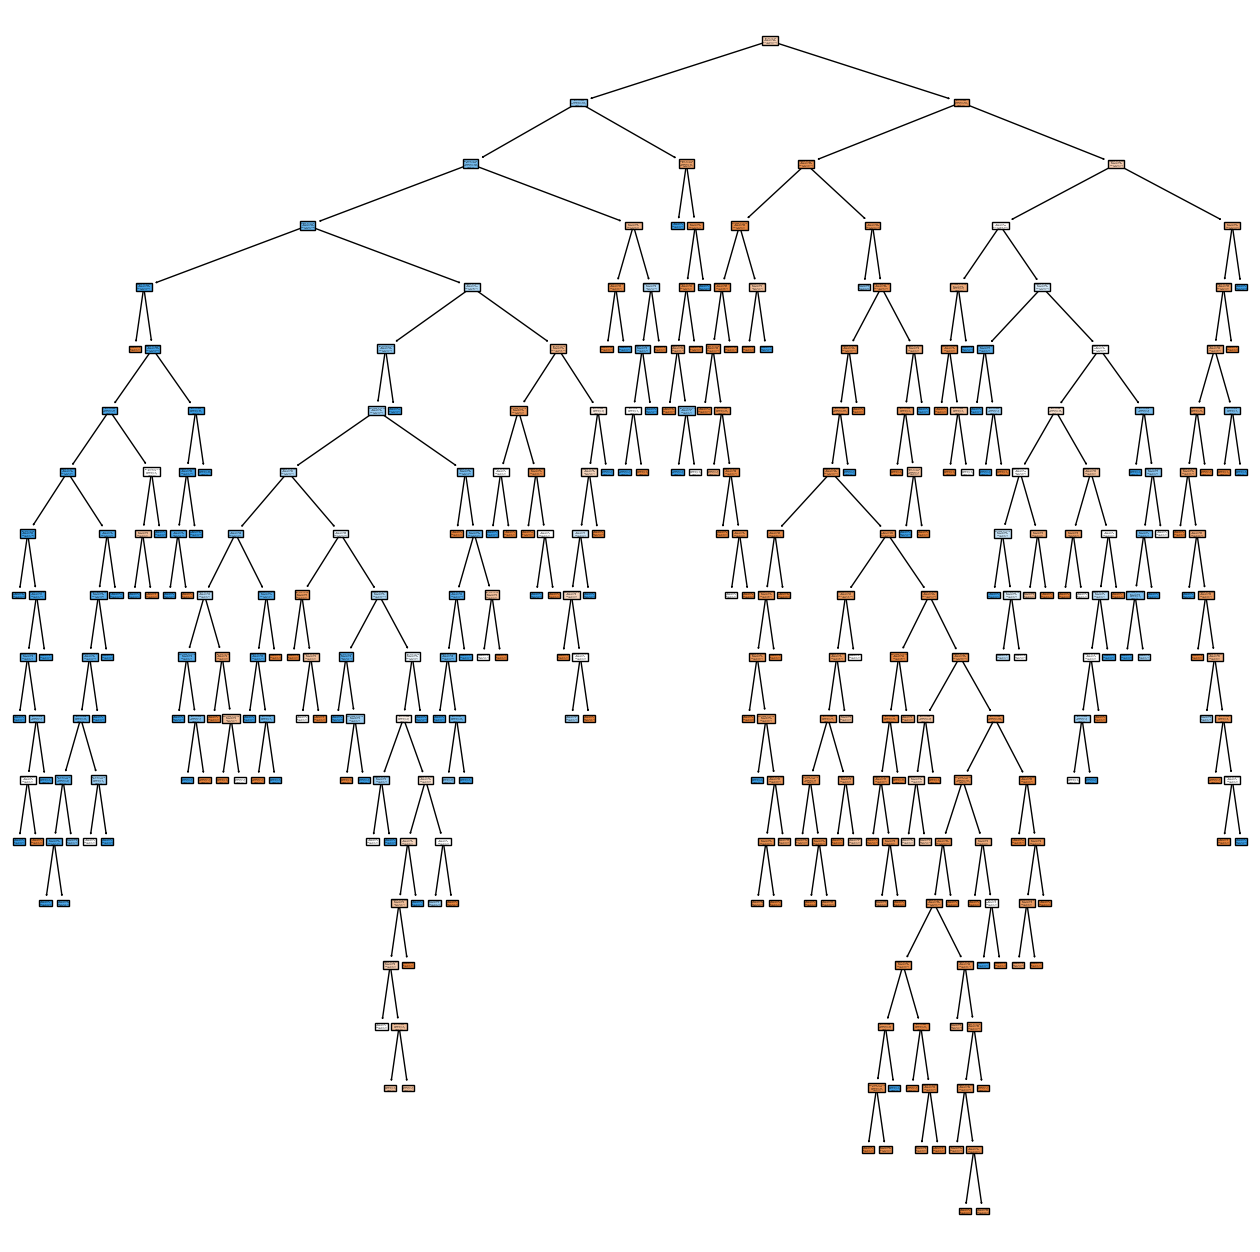

In [14]:
# Entscheidungsbaum visualisieren
#  (KNIME: "Decision Tree Learner")
names = df_train.columns.values
names = np.delete(names, 0) # Ersten Spaltennamen (= Survived) entfernen
names = names.tolist()
plt.figure(figsize=(16, 16))
plot_tree(model, feature_names=names, class_names=['0','1'], filled=True)
plt.show()

In [15]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

## Ergebnisse

#### Version 4 (Boolean bzw. Int)

Confusion Matrix

* TN (True  Negatives) : 485
* TP (True  Positives) : 237
* FN (False Negatives) : 105
* FP (False Positives) : 64

Gütemaße

* Genauigkeit  (Accuracy)    :   81,03 %
* Spezifität   (Specificity) :   88,34 %
* Sensitivität (Sensitivity) :   69,29 %
* Präzision    (Precision)   :   78,87 %
* Recall       (Recall)      :   69,29 %
* F-Maß        (F Score)     :   73,62 %
* AURC         (AURC)        :   84,08 %
* LogLoss      (LogLoss)     :    1,958

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  79,40 %

#### Version 5 (Float)

Confusion Matrix

* TN (True  Negatives) : 482
* TP (True  Positives) : 239
* FN (False Negatives) : 103
* FP (False Positives) : 67

Gütemaße

* Genauigkeit  (Accuracy)    :   80,92 %
* Spezifität   (Specificity) :   87,79 %
* Sensitivität (Sensitivity) :   69,88 %
* Präzision    (Precision)   :   78,62 %
* Recall       (Recall)      :   69,88 %
* F-Maß        (F Score)     :   73,72 %
* AURC         (AURC)        :   78,91 %
* LogLoss      (LogLoss)     :    5,151

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,04 %
